In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from keras_preprocessing.image import ImageDataGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [5]:
trainlabels = pd.read_csv("/kaggle/input/cifar-10/trainLabels.csv")


In [6]:
display(trainlabels)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [7]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 486.0 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.6/138.6 kB 1.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.2/357.2 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.2/379.2 kB 9.7 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 7.2 MB/s eta 0:00:00


In [8]:
import py7zr
temp_path = '/kaggle/temp/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
train_file_path = '/kaggle/input/cifar-10/train.7z'
archive = py7zr.SevenZipFile(train_file_path, mode='r')
archive.extractall(path=temp_path)
archive.close()


In [ ]:
temp_path = '/kaggle/test/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
test_file_path = '/kaggle/input/cifar-10/test.7z'
archive_test = py7zr.SevenZipFile(test_file_path, mode='r')
archive_test.extractall(path=temp_path)
archive.close()

In [ ]:
os.listdir(temp_path)

In [9]:
train_data = os.path.join(temp_path,'train')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

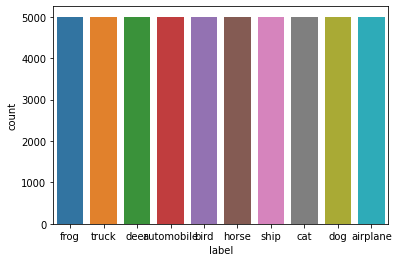

In [10]:
sns.countplot(trainlabels['label'])

In [12]:
def append_ext(fn):
    return "/kaggle/working/train/"+str(fn)+'.png'

In [13]:
trainlabels['path'] = trainlabels['id']
trainlabels['path'] = trainlabels['path'].apply(append_ext)
datagen=ImageDataGenerator(rotation_range=15,width_shift_range=4,height_shift_range=4, validation_split=0.2, rescale=1./255.)
bs=64

In [15]:
trainlabels.head()

,id,label,path
0,1,frog,/kaggle/working/train/1.png
1,2,truck,/kaggle/working/train/2.png
2,3,truck,/kaggle/working/train/3.png
3,4,deer,/kaggle/working/train/4.png
4,5,automobile,/kaggle/working/train/5.png


In [16]:
testlabels = pd.read_csv("/kaggle/input/cifar-10/Labels.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/cifar-10/Labels.csv'

In [14]:
train_generator=datagen.flow_from_dataframe(
                        dataframe=trainlabels,
                        x_col="path",
                        y_col="label",
                        batch_size=bs,
                        seed=42,
                        subset = 'training',
                        shuffle=True,
                        class_mode="categorical",
                        target_size =  (32,32))

valid_generator=datagen.flow_from_dataframe(
                        dataframe=testlabels,
                        x_col="path",
                        y_col="label",
                        batch_size=bs,
                        seed=42,
                        subset = 'validation',
                        shuffle=True,
                        class_mode="categorical",
                        target_size =  (32,32))

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 50000 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 0 validated image filenames belonging to 0 classes.


NameError: name 'testlabls' is not defined

AttributeError: 'MapDataset' object has no attribute 'make_one_shot_iterator'